In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.models import Sequential
import os
import cv2
from PIL import Image
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
dandelion=os.listdir('/content/drive/MyDrive/flowers/dandelion')
sunflower=os.listdir('/content/drive/MyDrive/flowers/sunflower')
tulip=os.listdir('/content/drive/MyDrive/flowers/tulip')
rose=os.listdir('/content/drive/MyDrive/flowers/rose')
daisy=os.listdir('/content/drive/MyDrive/flowers/daisy')

In [5]:
species=['dandelion','sunflower','tulip','rose','daisy']

In [6]:
print(type(dandelion[0]))
count=0


dadneliondata=[]
for file in dandelion:
    temp=cv2.imread("/content/drive/MyDrive/flowers/dandelion"+str(file),1)
    dadneliondata.append(temp)
print(len(dadneliondata))
sunflowerdata=[]
for file in sunflower:
    temp1=cv2.imread("/content/drive/MyDrive/flowers/sunflower"+str(file),1)
    sunflowerdata.append(temp1)
print(len(sunflowerdata))

tulipdata=[]
for file in tulip:
    temp=cv2.imread("/content/drive/MyDrive/flowers/tulip"+str(file),1)
    tulipdata.append(temp)
print(len(tulipdata))
rosedata=[]
for file in rose:
    temp=cv2.imread("/content/drive/MyDrive/flowers/rose"+str(file),1)
    rosedata.append(temp)
print(len(rosedata))
daisydata=[]
for file in daisy:
    temp=cv2.imread("/content/drive/MyDrive/flowers/daisy"+str(file),1)
    daisydata.append(temp)
print(len(daisydata))

<class 'str'>
1052
733
984
784
764


In [7]:
print(type(dandelion[0]))
count=0
X=[]
for file in dandelion:
    temp=cv2.imread("/content/drive/MyDrive/flowers/dandelion"+str(file),1)
    X.append(temp)
print(len(X))
for file in sunflower:
    temp1=cv2.imread("/content/drive/MyDrive/flowers/sunflower"+str(file),1)
    X.append(temp1)
print(len(X))
for file in tulip:
    temp=cv2.imread("/content/drive/MyDrive/flowers/tulip"+str(file),1)
    X.append(temp)
print(len(X))
for file in rose:
    temp=cv2.imread("/content/drive/MyDrive/flowers/rose"+str(file),1)
    X.append(temp)
print(len(X))
for file in daisy:
    temp=cv2.imread("/content/drive/MyDrive/flowers/daisy"+str(file),1)
    X.append(temp)
print(len(X))

<class 'str'>
1052
1785
2769
3553
4317


In [8]:
import glob

In [9]:
%%time
#
images_shapes = {"height": [], "width": []}
#
for cat in species:
    filelist = glob.glob('/content/drive/MyDrive/flowers/' + cat + '/*.jpg')
    for fname in filelist:
        images_shapes["height"].append(np.array(Image.open(fname)).shape[0])
        images_shapes["width"].append(np.array(Image.open(fname)).shape[1])

CPU times: user 17 s, sys: 2.03 s, total: 19.1 s
Wall time: 2min 14s


In [10]:
display("Average height: " + str(int(np.mean(images_shapes["height"]))))
display("Average width: " + str(int(np.mean(images_shapes["width"]))))

'Average height: 253'

'Average width: 338'

In [11]:
im_width = int(338/2)
im_height = int(253/2)

In [12]:
display("Used height: " + str(im_height))
display("Used width: " + str(im_width))

'Used height: 126'

'Used width: 169'

In [13]:
data = []
target = []

In [14]:
%%time
for cat in species:
    filelist = glob.glob('/content/drive/MyDrive/flowers/' + cat + '/*.jpg')
    target.extend([cat for _ in filelist])
    data.extend([np.array(Image.open(fname).resize((im_width, im_height))) for fname in filelist])
#
data_array = np.stack(data, axis=0)

CPU times: user 13.9 s, sys: 1.21 s, total: 15.2 s
Wall time: 31.4 s


In [15]:
data_array.shape

(4317, 126, 169, 3)

In [16]:
import random

In [17]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, data_array.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(target[num_image])
        ax.imshow(data_array[num_image]);

In [18]:
pd.DataFrame(target).value_counts()/len(target)

0        
dandelion    0.243688
tulip        0.227936
rose         0.181608
daisy        0.176975
sunflower    0.169794
Name: count, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_array, np.array(target), random_state=43, test_size=0.2, stratify=target)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3453, 126, 169, 3)
(864, 126, 169, 3)
(3453,)
(864,)


In [22]:
pd.DataFrame(y_train).value_counts()/len(y_train)

0        
dandelion    0.243846
tulip        0.227918
rose         0.181581
daisy        0.176948
sunflower    0.169708
Name: count, dtype: float64

In [23]:
pd.DataFrame(y_test).value_counts()/len(y_test)

0        
dandelion    0.243056
tulip        0.228009
rose         0.181713
daisy        0.177083
sunflower    0.170139
Name: count, dtype: float64

In [24]:
print(X_train.max())
print(X_train.min())

255
0


In [25]:
X_test_norm = np.round((X_test/255), 3).copy()
X_train_norm = np.round((X_train/255), 3).copy()

In [26]:
import random

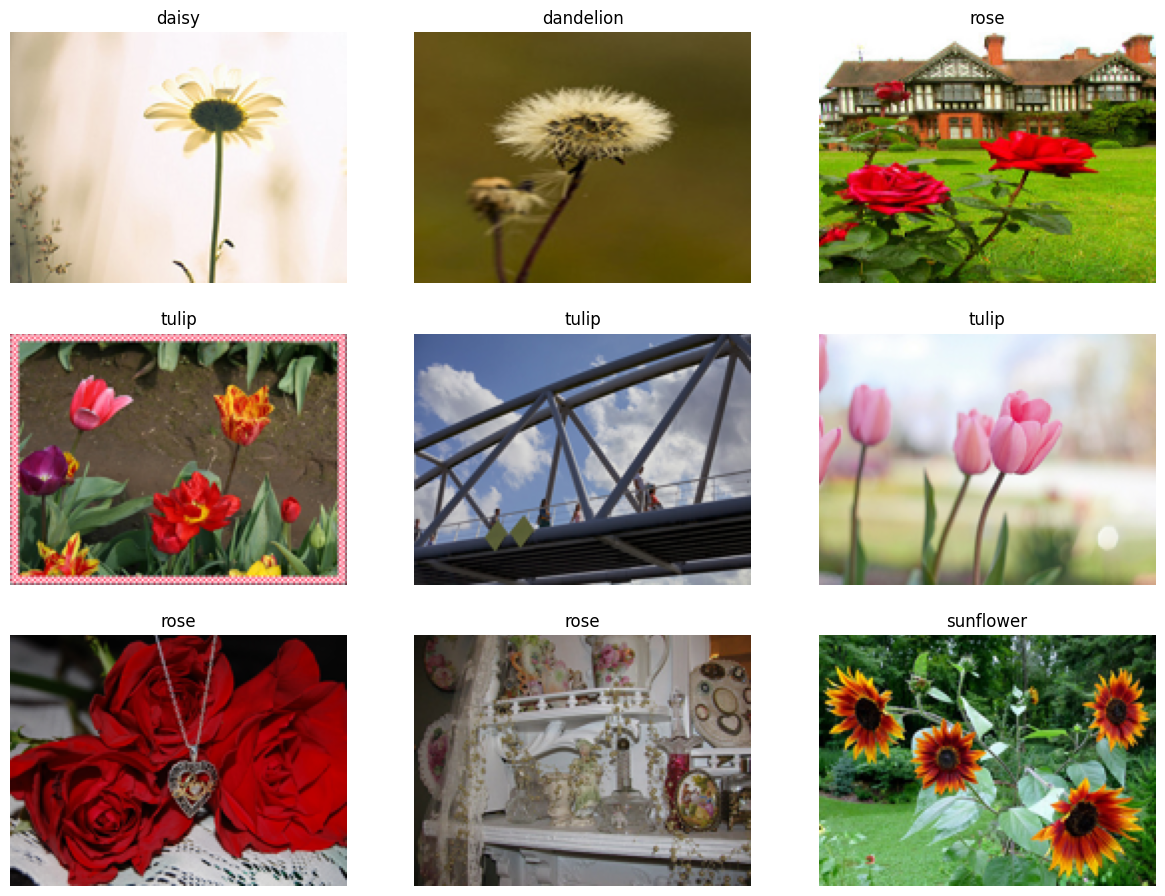

In [27]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_train_norm.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(y_train[num_image])
        ax.imshow(X_train_norm[num_image]);

In [28]:
display(np.array(y_train).shape)
display(np.unique(y_train))
display(np.array(y_test).shape)
display(np.unique(y_test))

(3453,)

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype='<U9')

(864,)

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype='<U9')

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder = LabelEncoder().fit(y_train)

In [31]:
y_train_cat = encoder.transform(y_train)
y_test_cat = encoder.transform(y_test)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_train_oh = to_categorical(y_train_cat)
y_test_oh = to_categorical(y_test_cat)

In [34]:
pd.DataFrame(y_test_oh).head()

0    1    2    3    4
0  0.0  0.0  0.0  0.0  1.0
1  0.0  0.0  0.0  1.0  0.0
2  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  1.0  0.0  0.0

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(im_height, im_width, 3), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(5, activation='softmax'))

    return model

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
model = initialize_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 169, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 63, 84, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 42, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       2,150,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,251,333 (8.59 MB)

 Trainable params: 2,251,333 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model = initialize_model()
model = compile_model(model)
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

#model = initialize_model()
history = model.fit(X_train_norm, y_train_oh,
                    batch_size=16,
                    epochs=2000,
                    validation_data=(X_test_norm, y_test_oh),
                    callbacks=[es])

Epoch 1/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.3291 - loss: 1.4747 - val_accuracy: 0.5521 - val_loss: 1.0768
Epoch 2/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.6026 - loss: 1.0260 - val_accuracy: 0.6551 - val_loss: 0.9170
Epoch 3/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6665 - loss: 0.8730 - val_accuracy: 0.6528 - val_loss: 0.8899
Epoch 4/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7402 - loss: 0.6979 - val_accuracy: 0.6562 - val_loss: 0.8779
Epoch 5/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8079 - loss: 0.5343 - val_accuracy: 0.6644 - val_loss: 1.0328
Epoch 6/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8648 - loss: 0.3688 - val_accuracy: 0.6562 - val_loss: 1.0917
Epoch 7/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8983 - loss: 0.2750 - val_accuracy: 0.6574 - val_loss: 1.3612
Epoch 8/2000
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9303 - loss:

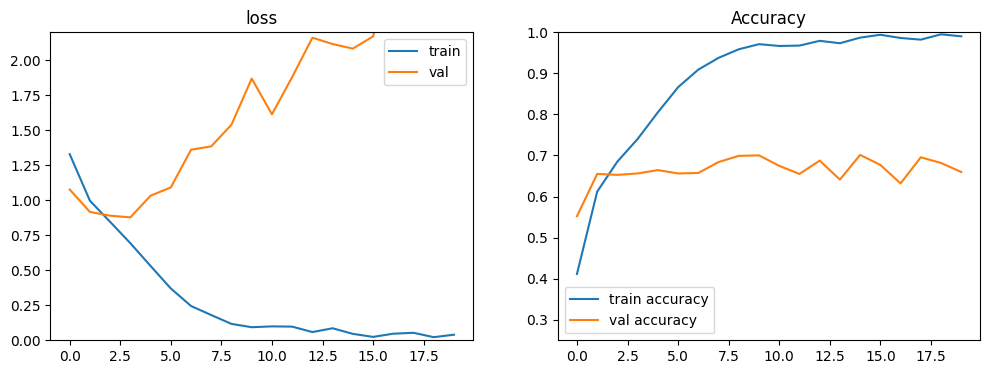

In [42]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="");

In [43]:
model.evaluate(X_test_norm, y_test_oh, verbose=0)

[2.0832884311676025, 0.7013888955116272]

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=(0.8, 1.2),)
#
datagen.fit(X_train_norm)

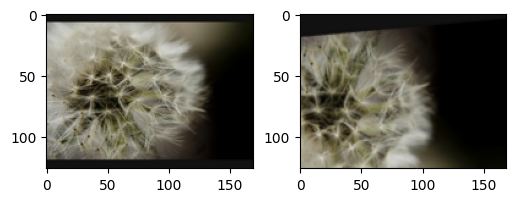

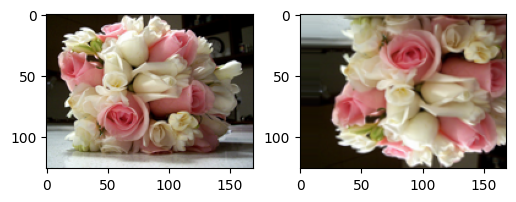

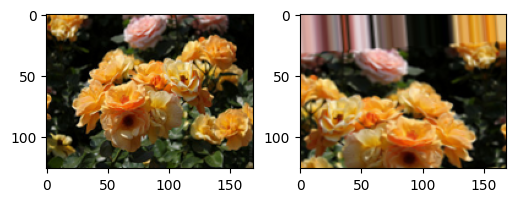

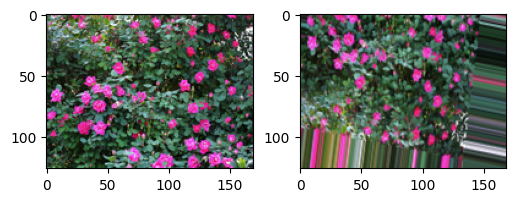

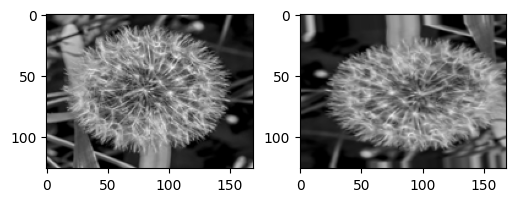

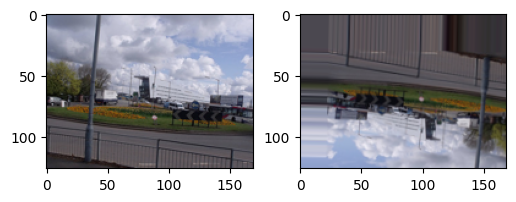

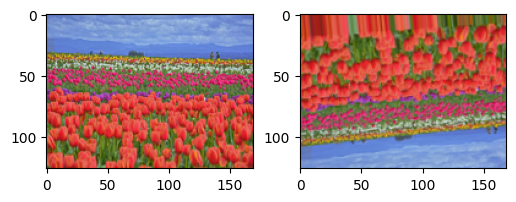

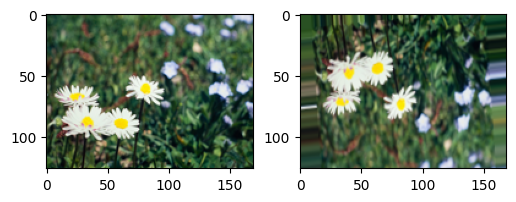

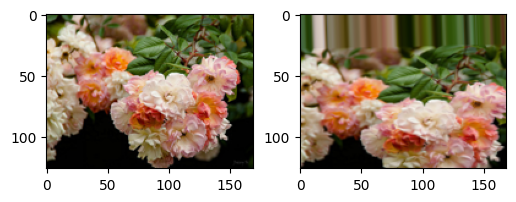

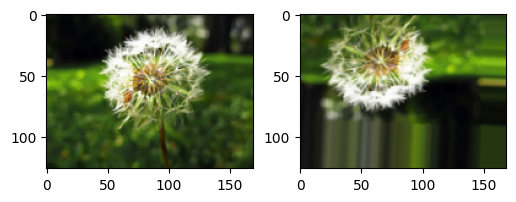

In [46]:
X_augmented = datagen.flow(X_train_norm, shuffle=False, batch_size=1)

for i, (raw_image, augmented_image) in enumerate(zip(X_train_norm, X_augmented)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

In [47]:
model_aug = initialize_model()
model_aug = compile_model(model_aug)
train_flow = datagen.flow(X_train_norm, y_train_oh, batch_size=32)
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

#model = initialize_model()
history_aug = model_aug.fit(train_flow,
                            epochs=2000,
                            validation_data=(X_test_norm, y_test_oh),
                            callbacks=[es])

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 269ms/step - accuracy: 0.3188 - loss: 1.5074 - val_accuracy: 0.5208 - val_loss: 1.1096
Epoch 2/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.4814 - loss: 1.1926 - val_accuracy: 0.5822 - val_loss: 1.0361
Epoch 3/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.5671 - loss: 1.0765 - val_accuracy: 0.6273 - val_loss: 0.9354
Epoch 4/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - accuracy: 0.6075 - loss: 0.9782 - val_accuracy: 0.6644 - val_loss: 0.8676
Epoch 5/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.6221 - loss: 0.9650 - val_accuracy: 0.6898 - val_loss: 0.8303
Epoch 6/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.6497 - loss: 0.8954 - val_accuracy: 0.6539 - val_loss: 0.9420
Epoch 7/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.6452 - loss: 0.9089 - val_accuracy: 0.6875 - val_loss: 0.8468
Epoch 8/2000
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.6585 - loss

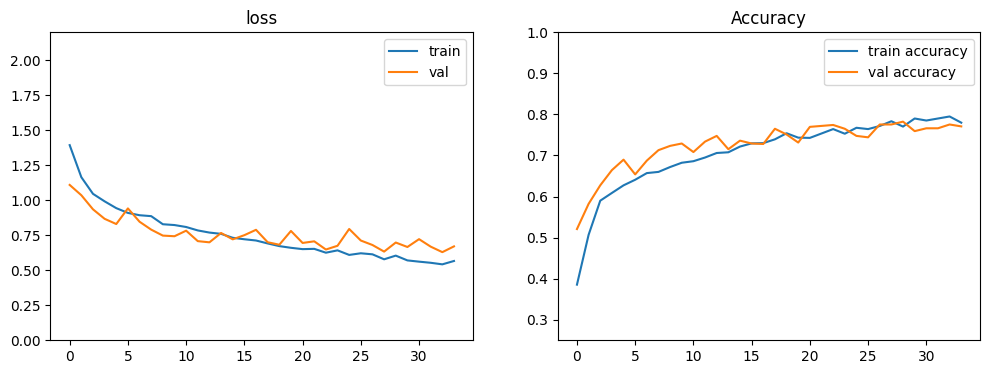

In [48]:
plot_history(history_aug, title='', axs=None, exp_name="");

In [49]:
model_aug.evaluate(X_test_norm, y_test_oh, verbose=0)

[0.6981759071350098, 0.7824074029922485]

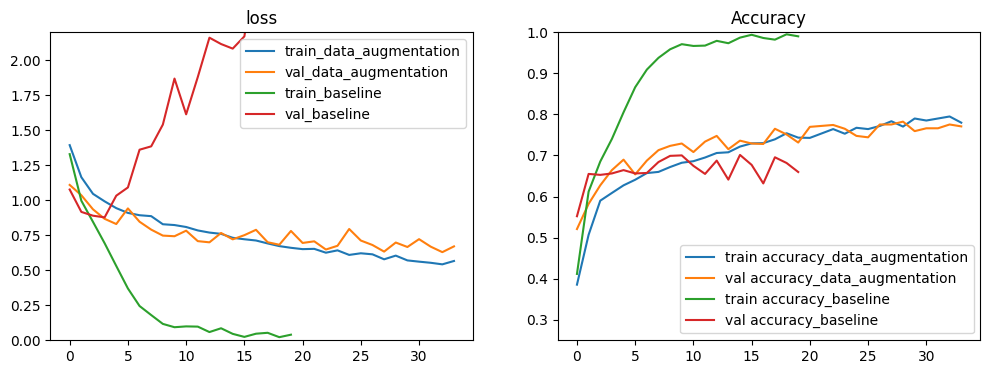

In [50]:
axs = plot_history(history_aug, exp_name='data_augmentation')
plot_history(history ,axs=axs, exp_name='baseline')
plt.show()

In [51]:
import tensorflow as tf
import keras
# Instead of importing keras_preprocessing directly, import the specific modules you need from tensorflow.keras.preprocessing
# !pip install keras_preprocessing # This line is commented out and replaced with the lines below if necessary
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import  MobileNetV2, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenetv2

In [52]:
def create_model_from_VGG16():

    model = VGG16(weights = "imagenet", include_top=False, input_shape = (126,169, 3))

    # don't train existing weights
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Layers
    x = model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    #x = keras.layers.Dropout(0.5)(x)
    #x = keras.layers.Dense(1024, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)

    # creating the final model
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return final_model

create_model_from_VGG16().summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 126, 169, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 126, 169, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 126, 169, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 63, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 63, 84, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 63, 84, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 31, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 31, 42, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 31, 42, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 31, 42, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 15, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 15, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 15, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 15, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 10, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 10, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 10, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 10, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7680)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         983,168 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,698,501 (59.89 MB)

 Trainable params: 983,813 (3.75 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
import time

In [54]:
epochs = 10
start = time.time()

model_from_vgg16 = create_model_from_VGG16()
history2 = model_from_vgg16.fit(train_flow,
                            epochs=epochs,
                            validation_data=(X_test_norm, y_test_oh),
                            callbacks=[es]
                     )

end = time.time()
duration = end - start
print ('\n model from trained with VGG16 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 292ms/step - accuracy: 0.4440 - loss: 1.5606 - val_accuracy: 0.7176 - val_loss: 0.8044
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6859 - loss: 0.8657 - val_accuracy: 0.7373 - val_loss: 0.7190
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 202ms/step - accuracy: 0.7364 - loss: 0.7174 - val_accuracy: 0.7627 - val_loss: 0.6624
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 193ms/step - accuracy: 0.7419 - loss: 0.6747 - val_accuracy: 0.7060 - val_loss: 0.7785
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.7321 - loss: 0.6632 - val_accuracy: 0.7743 - val_loss: 0.6269

 model from trained with VGG16 took 170.07 seconds (2.8 minutes) to train for 10 epochs


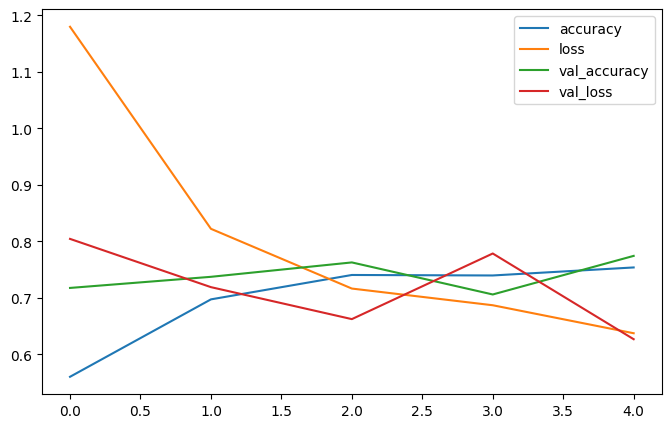

In [55]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.show()

In [56]:
model.save('flowers_model.h5')

In [57]:
model_from_vgg16.evaluate(train_flow)

108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.6840 - loss: 0.8460


[0.8415216207504272, 0.6892557144165039]

In [58]:
def create_model_from_ResNet50():

    model = ResNet50(weights = "imagenet", include_top=False, input_shape = (126,169, 3))

    # don't train existing weights
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Dense Layers
    x = model.output
    x = keras.layers.Flatten()(x)
    #x = keras.layers.Dense(128, activation="relu")(x)
    #x = keras.layers.Dropout(0.5)(x)
    #x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)

    # creating the final model
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return final_model
create_model_from_ResNet50().summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 126, 169, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 132, 175, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 63, 85, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 63, 85, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 63, 85, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 65, 87, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 43, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 43, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 43, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 43, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 43, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 43, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 43, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 43, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 43, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 36,172,165 (137.99 MB)

 Trainable params: 12,584,453 (48.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [59]:
def create_model_from_mobilenetv2():

    model = MobileNetV2(weights = "imagenet", include_top=False, input_shape = (126,169, 3))

    # don't train existing weights
    for layer in model.layers:
      layer.trainable = False

    #Adding custom Dense Layers
    x = model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    predictions = keras.layers.Dense(5, activation="softmax")(x)

    # creating the final model
    final_model = keras.models.Model(inputs = model.input, outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return final_model

create_model_from_mobilenetv2().summary()

<ipython-input-59-0205648cddf6>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights = "imagenet", include_top=False, input_shape = (126,169, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 126, 169, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 63, 85, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 63, 85, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 63, 85, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 63, 85, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 63, 85, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 63, 85, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 63, 85, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 63, 85, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 63, 85, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 63, 85, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 63, 85, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 87, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 43, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 6,258,885 (23.88 MB)

 Trainable params: 4,000,901 (15.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [60]:
epochs = 10
start = time.time()

model_mobilenetV2 = create_model_from_mobilenetv2()
history4 = model_mobilenetV2.fit(train_flow,
                            epochs=epochs,
                            validation_data=(X_test_norm, y_test_oh),
                            callbacks=[es]

                     )

end = time.time()
duration = end - start
print ('\n model from trained from MobileNetV2 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

<ipython-input-59-0205648cddf6>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights = "imagenet", include_top=False, input_shape = (126,169, 3))


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 255ms/step - accuracy: 0.4434 - loss: 1.7650 - val_accuracy: 0.6817 - val_loss: 0.8191
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.5586 - loss: 1.0638 - val_accuracy: 0.7685 - val_loss: 0.6237
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - accuracy: 0.6164 - loss: 0.9667 - val_accuracy: 0.7083 - val_loss: 0.7506
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.5867 - loss: 1.0609 - val_accuracy: 0.7141 - val_loss: 0.7776
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.6088 - loss: 1.0379 - val_accuracy: 0.7546 - val_loss: 0.6436

 model from trained from MobileNetV2 took 117.47 seconds (2.0 minutes) to train for 10 epochs


In [61]:
model_mobilenetV2.evaluate(train_flow)

108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.6589 - loss: 0.8657


[0.8709197044372559, 0.6605849862098694]

In [62]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [63]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
from keras.preprocessing import image

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
from keras.preprocessing import image

labels = ['Daisy','Dadelion','Rose','Sunflower','Tulip'] #classes

# Remove the 'shape' argument from gr.Image
image = gr.Image(type="numpy")  # Removed shape argument
label = gr.Label(num_top_classes=1)

# Resize the image within the classify_image function using tf.image.resize
def classify_image(inp):
  img = tf.image.resize(inp, [126, 169])  # Resize the image here
  img = img.numpy().reshape((-1,126,169,3)) #reshape input image
  prediction = model_from_vgg16.predict(img).flatten() #prediction
  return {labels[i]: float(prediction[i]) for i in range(5)} #return classes


# Remove capture_session=True from gr.Interface
gr.Interface(fn=classify_image, inputs=image, outputs=label).launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d6eb2c432aa96bcde3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
